# Linear regression

home price = m * (area) + b

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


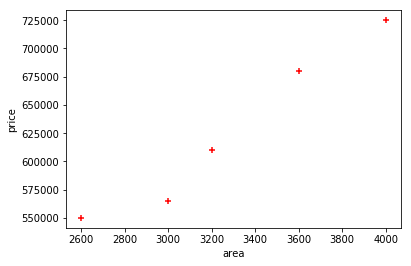

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
area = df[['area']]
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [13]:
a2 = np.c_[area,area**2]
a2

array([[    2600,  6760000],
       [    3000,  9000000],
       [    3200, 10240000],
       [    3600, 12960000],
       [    4000, 16000000]])

In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [14]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(a2,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
reg.predict([[3000,9000000]])

array([583340.56399132])

In [17]:
reg.coef_

array([-8.57054822e+01,  3.34623348e-02])

In [10]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [11]:
5000*135.78767123 + 180616.43835616432

859554.7945061643

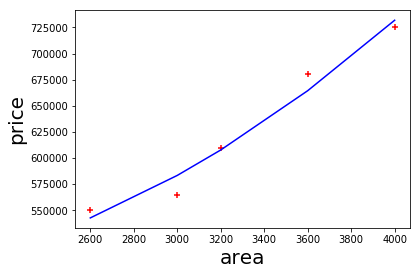

In [18]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(a2),color='blue')

# Linear Regression Multiple Variables

In [20]:
df = pd.read_csv('./datasets/homeprices2.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [21]:
import math
med_bedrooms = math.floor(df.bedrooms.median())

In [22]:
df.bedrooms = df.bedrooms.fillna(med_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [25]:
reg.intercept_

221323.00186540408

In [26]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])